# Credit Card Fraud Detection

### Problem statement:

Credit Card Fraud is one of the biggest issues faced by the government and the amount of money involved in this is generally enormous.As world is getting more towards digitalization, the risk of online fraud is also increasing. The websites with online payment mode contributes to rise in online frauds. Also, due to this pandemic situation(COVID-19), everyone prefers to do cashless transaction which increases the chances of people getting trapped into such frauds.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.Among all of the online frauds, one such fraud is credit card fraud which is an ever growing menace in the financial industry. Detecting fraudulent transaction is of great importance for any credit card company.

We are going to approach this real life problem using Data Science.

### Proposal:

The development of a model that provide best results in identifying credit card fraudulent transactions.
The problem : If we are able to identify/predict if a transaction is fraudulent or genuine 

This helps both, the credit card company and the customers from getting charged unnecessarily.

Our Goal:
Understand the little distribution of the "little" data that was provided to us.

Create a 50/50 sub-data frame ratio of "Fraud" and "Non-Fraud" transactions to avoid overfitting.

## Logistic Regression, K Nearest, SVC and Decision Tree classifier.
We will be using LogisticRegression
## We will use learning curve and ROC Curve to understand which of the models best suite.


### Data set

The dataset is obtained from Kaggle.
https://www.kaggle.com/mlg-ulb/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

There are 284807 number of transactions(rows) and 31 features in this dataset.

Time: It contains the seconds elapsed between each transaction and the first transaction in the dataset.

Amount: It is the transaction Amount.

Class: It is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [1]:
# Load the packages
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import __version__ as mpv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import __version__ as sklv
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#$$
print('Using version %s of pandas' % pd.__version__)
print('Using version %s of pandas_profiling' % pp.__version__)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of seaborn' % sns.__version__)
print('Using version %s of sklearn' % sklv)
print('Using version %s of numpy' % np.__version__)

Using version 1.1.1 of pandas
Using version 2.9.0 of pandas_profiling
Using version 3.3.1 of matplotlib
Using version 0.11.0 of seaborn
Using version 0.23.2 of sklearn
Using version 1.19.1 of numpy


In [2]:
# Load data into a dataframe
addr = "./creditcard.csv"
data = pd.read_csv(addr)

In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (284807, 31)


In [4]:
# Looking at the column names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Since we will not have unseen data, we have two options. First, we can build our model and wait for new data to be generated or captured and see how we do. Often times, this is infeasible for a myriad of reasons.

For this we can create a holdout or a test set. This set, which we assume to be independent and identically distrubted (iid.) will serve as our objective "unseen" data. That said, once we "see" or "peek" at that data, then it is no longer unseen. 

So we are splitting the data into two sets, train and test. We will be only looking at the train data for now, so that we can use the test data strictly as future data.

In [5]:
seed = 42
train, test = train_test_split(data,
                               train_size=0.80,
                               random_state=seed,
                               )


# save the train and test file
# again using the '\t' separator to create tab-separated-values files
#train.to_csv(train_path, sep='\t', index=False)
#test.to_csv(test_path, sep='\t', index=False)

In [6]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993,0.001729
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000,0.000000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000,0.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [7]:
# Checking for NULL values
train.isnull().sum().max()

0

In [8]:
#pp.ProfileReport(test).to_notebook_iframe()

We will firstly focus on the features such as Time, Amount and Class, since rest of them are anonymized(unnamed).

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train['Class'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['Class'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions ( 0 = No Fraud  1 = Fraud )')

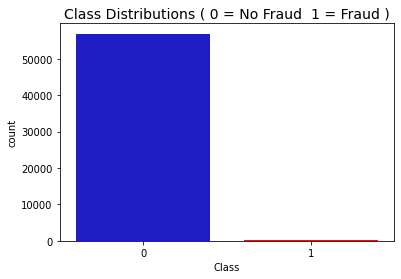

In [10]:
colors = ["#0101DF", "#DF0101"]
sns.countplot()
sns.countplot( 'Class', data=test, palette=colors)
plt.title('Class Distributions ( 0 = No Fraud  1 = Fraud )', fontsize=14)

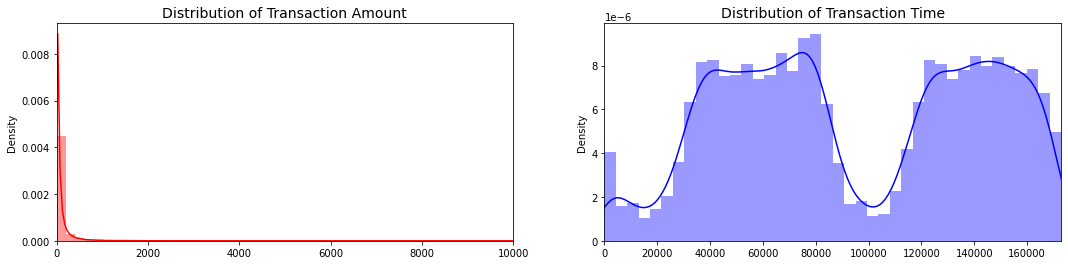

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = test['Amount'].values
time_val = test['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

From the above graph, we have noticed that the distribution of time is bimodal in nature which inturns also indicates that there is a sudden fall in the volume of transactions after 28 hours of the first transaction been made.
As the timing of the transactions are not provided, we can assume that the drop in volume occured during night.

Fraud VS Non-Fraud Time Distribution

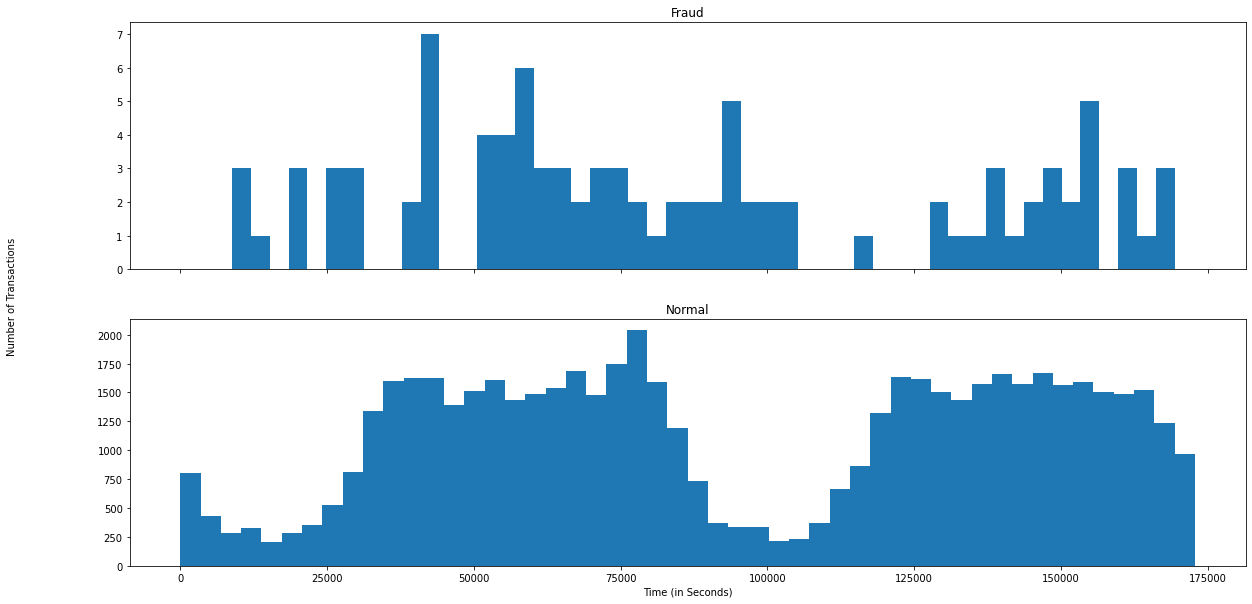

In [12]:
fraud_time = test[test['Class'] == 1]['Time']
no_fraud_time = test[test['Class'] == 0]['Time']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))
bins=50

ax1.hist(fraud_time, bins = bins)
ax1.set_title('Fraud')

ax2.hist(no_fraud_time, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
fig.text(0.04,0.5, 'Number of Transactions', va='center', rotation='vertical')

plt.show()

Amount Distribution

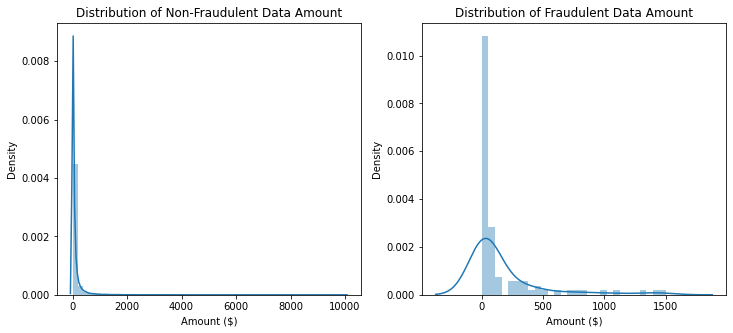

In [13]:
fraud_amt = test[test['Class'] == 1]['Amount']
no_fraud_amt = test[test['Class'] == 0]['Amount']

plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(no_fraud_amt)
plt.xlabel('Amount ($)')
plt.title('Distribution of Non-Fraudulent Data Amount')

plt.subplot(1, 2, 2)
sns.distplot(fraud_amt)
plt.xlabel('Amount ($)')
plt.title('Distribution of Fraudulent Data Amount');

In [14]:
# Describing the Fraud amount
print(f"Fraud Amount Info: \n {fraud_amt.describe()}")
print('\n\n')
# Describing the Non-Fraud amount
print(f"Non-Fraud Amount Info: \n {no_fraud_amt.describe()}")

Fraud Amount Info: 
 count      98.000000
mean      164.065306
std       314.896663
min         0.000000
25%         1.000000
50%        15.170000
75%       126.025000
max      1504.930000
Name: Amount, dtype: float64



Non-Fraud Amount Info: 
 count    56864.000000
mean        87.696743
std        229.685013
min          0.000000
25%          5.640000
50%         22.000000
75%         77.285000
max      10000.000000
Name: Amount, dtype: float64


distribution of anomalous features

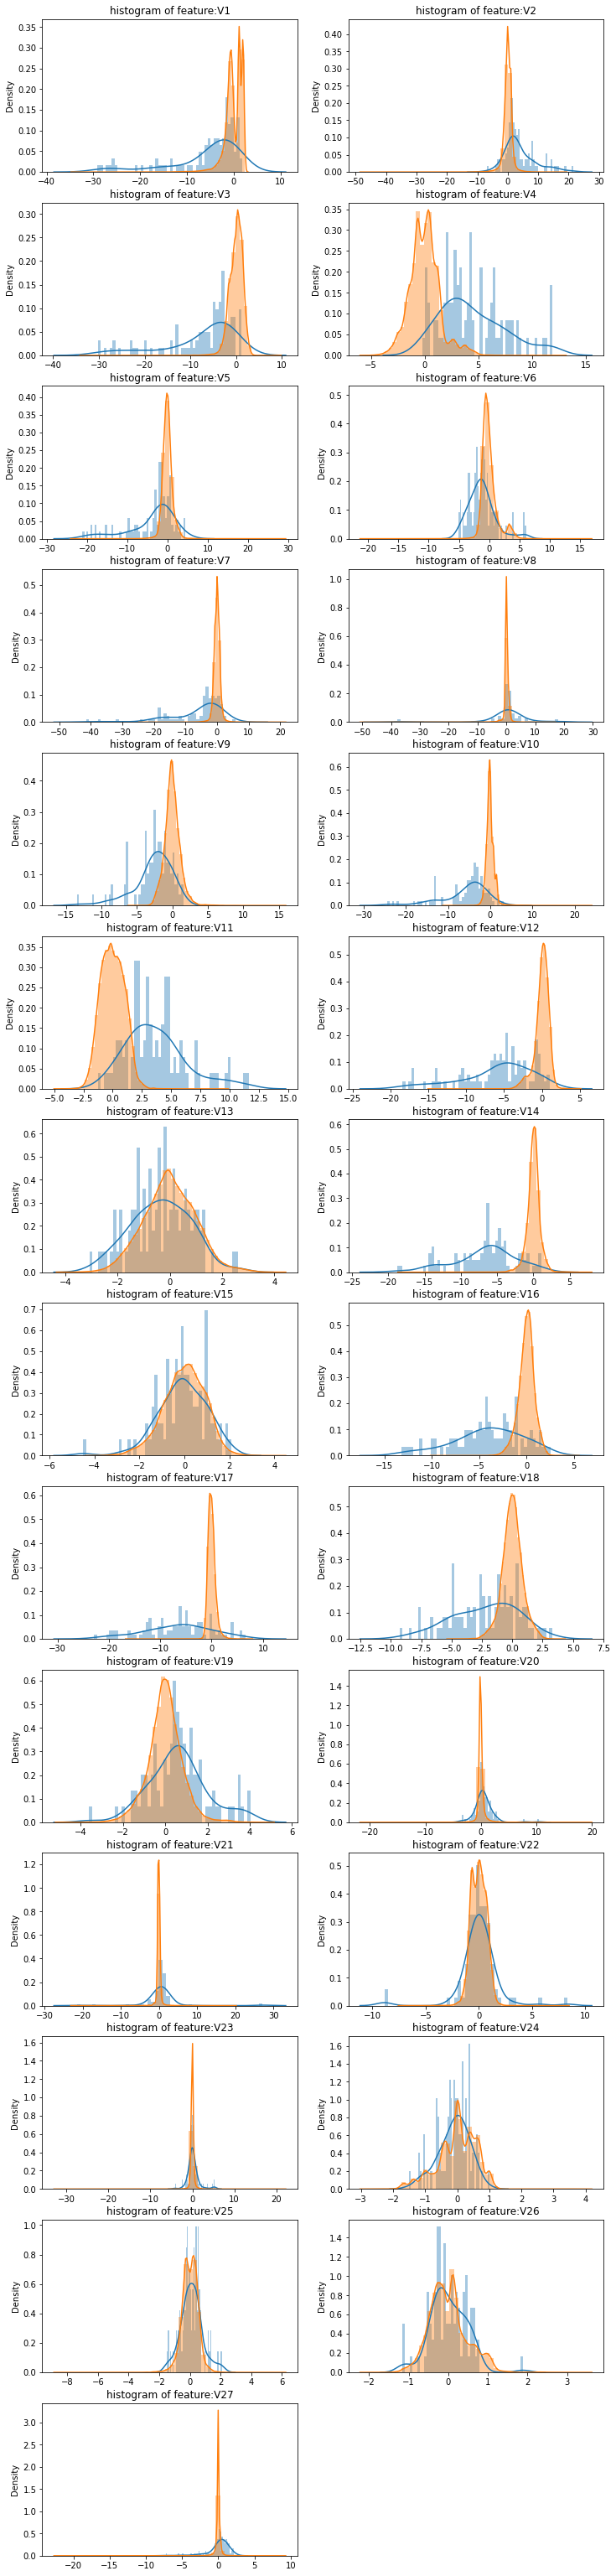

In [15]:

features = test.iloc[:,1:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 2)
for i, c in enumerate(test[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(test[c][test.Class == 1], bins=50)
 sns.distplot(test[c][test.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature:' + str(c))
plt.show()




Correlation between features

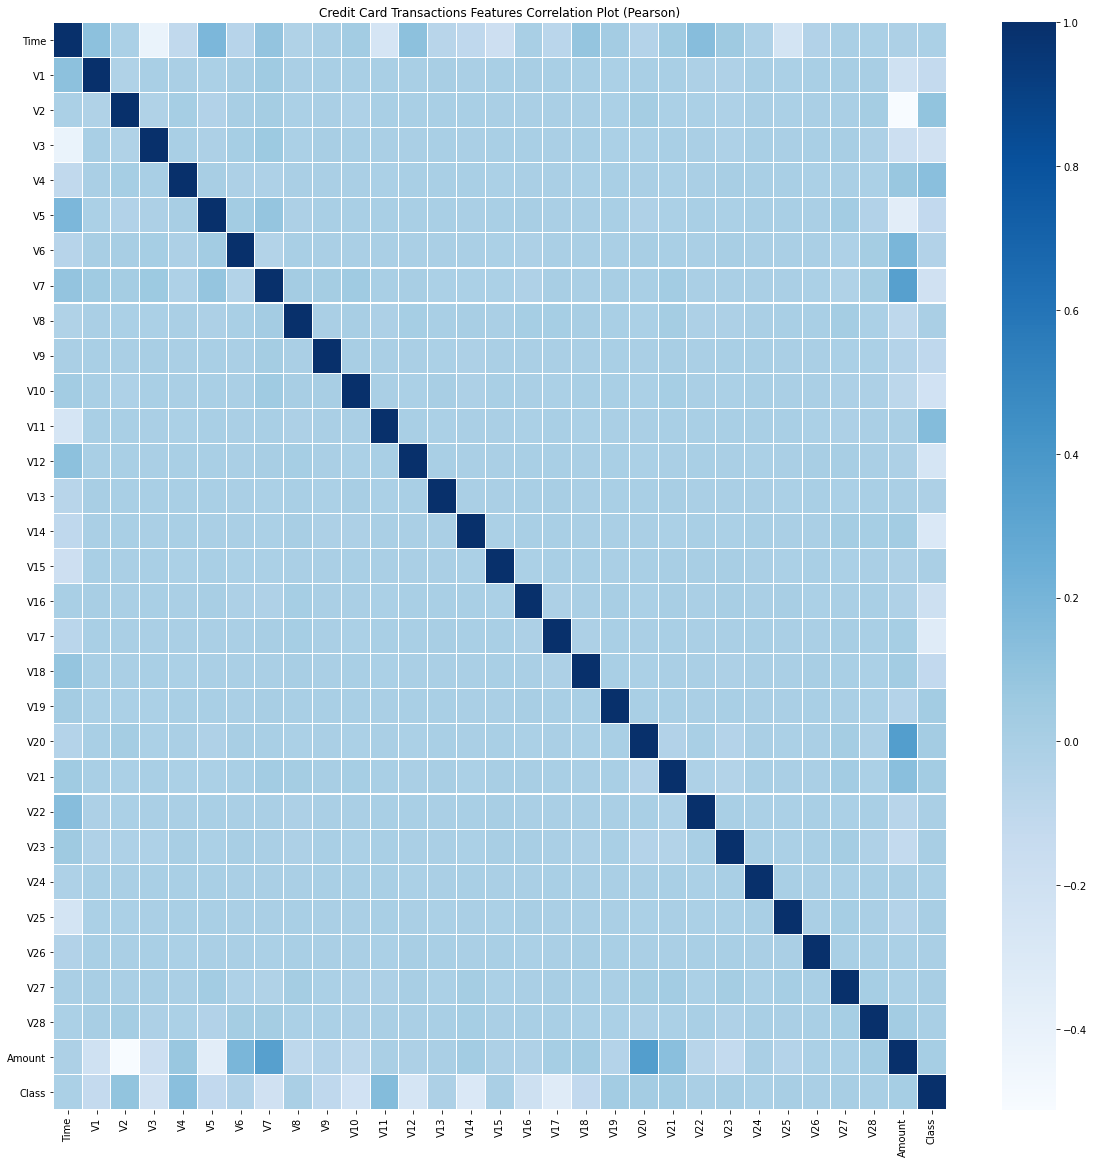

In [16]:
#%matplotlib inline
#plt.figure(figsize = (20,20))
plt.rcParams['figure.figsize'] = (20,20)
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)')
corr = test.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

As we can see, some of the predictors do seem to have correlation between them. 
But majority of the predictors are not correlated. 
This could be due below factors
The dimensionality of data is already reduced using PCA(Principle Component Analysis), therefore our predictors are principal components. Principal Components are orthogonal to each other.
The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

Dividing the data into features and label sets

In [17]:
features = test[test.columns[:-1]]
labels = test['Class']
features.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


In [18]:
labels.head()

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

In [19]:
x_train = features.values
y_train = labels.values

Pearson Ranking

<AxesSubplot:title={'center':'Pearson Ranking of 30 Features'}>

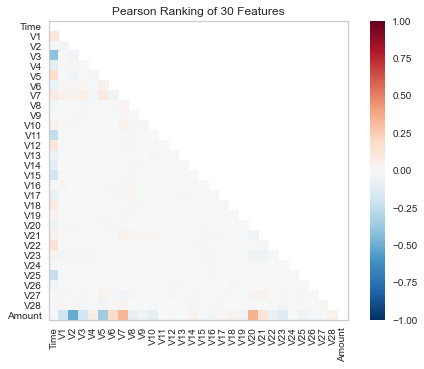

In [20]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = x_train

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features.columns, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="./pcoords1.png") # Draw/show/poof the data
#plt.show()


#  Part 2  : Dimensionality and Feature Reduction

### 1. Variance Threshold : A baseline approach to feature selection

In [21]:
# Load libraries

from sklearn.feature_selection import VarianceThreshold

# Create thresholder
thresholder = VarianceThreshold(threshold=.5)

# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features)

# View high variance feature matrix
features_high_variance[0:3]

array([[ 4.15050000e+04, -1.65265066e+01,  8.58497180e+00,
        -1.86498532e+01,  9.50559352e+00, -1.37938185e+01,
        -2.83240430e+00, -1.67016943e+01,  7.51734390e+00,
        -8.50705864e+00, -1.41101844e+01,  5.29923635e+00,
        -1.08340065e+01,  1.67112025e+00, -9.37385858e+00,
         3.60805642e-01, -9.89924654e+00, -1.92362924e+01,
        -8.39855199e+00,  3.10173537e+00, -1.51492344e+00,
         1.19073869e+00, -1.12767001e+00,  3.64190000e+02],
       [ 4.42610000e+04,  3.39812064e-01, -2.74374524e+00,
        -1.34069511e-01, -1.38572931e+00, -1.45141332e+00,
         1.01588659e+00, -5.24379057e-01,  2.24060376e-01,
         8.99746005e-01, -5.65011684e-01, -8.76702573e-02,
         9.79426988e-01,  7.68828168e-02, -2.17883812e-01,
        -1.36829588e-01, -2.14289209e+00,  1.26956065e-01,
         1.75266151e+00,  4.32546224e-01,  5.06043885e-01,
        -2.13435844e-01, -9.42525025e-01,  5.20120000e+02],
       [ 3.54840000e+04,  1.39959027e+00, -5.90701288e

As the name suggests, it drops all features where the variance along the column does not exceed a threshold value. The premise is that a feature which doesn’t vary much within itself, has very little predictive power.



As you can see the number of features have been reduced from 30 to 24, Dropping 6 features.

#  Part 3  : Model Evaluation and Selection.

Here we are trying to predict of a transaction is Fraud or not, so this is a classification problem.
we are going to use logistic regression.

In [22]:
A_train, A_val, B_train, B_val = train_test_split(x_train, y_train, test_size =0.3, random_state=11)


# number of samples in each set
print("No. of samples in training set: ", A_train.shape[0])
print("No. of samples in validation set:", A_val.shape[0])


# Survived and not-survived
print('\n')
print('No. of 0:- Genuine Transactions and 1:- Fraud Transactions in the training set:')
#print(B_train.[values]
unique, counts = np.unique(B_train, return_counts=True)
print(dict(zip(unique, counts)))

print('\n')
print('No. of 0:- Genuine Transactions and 1:- Fraud Transactions in the training set:')
#print(B_val.shape[0])
unique, counts = np.unique(B_val, return_counts=True)
print(dict(zip(unique, counts)))

No. of samples in training set:  39873
No. of samples in validation set: 17089


No. of 0:- Genuine Transactions and 1:- Fraud Transactions in the training set:
{0: 39808, 1: 65}


No. of 0:- Genuine Transactions and 1:- Fraud Transactions in the training set:
{0: 17056, 1: 33}


Model Evaluation

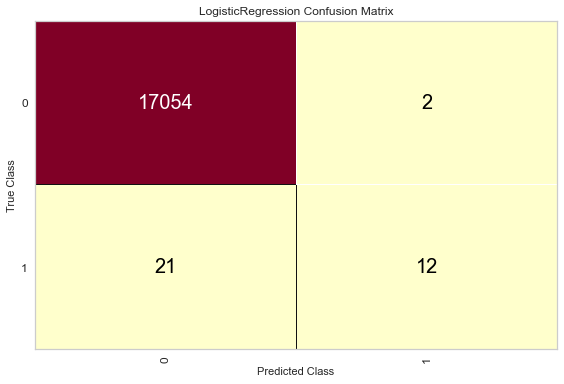

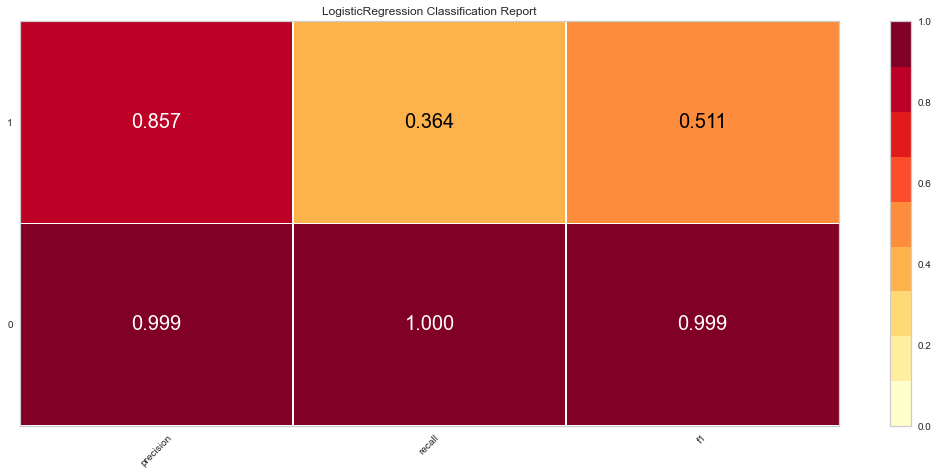

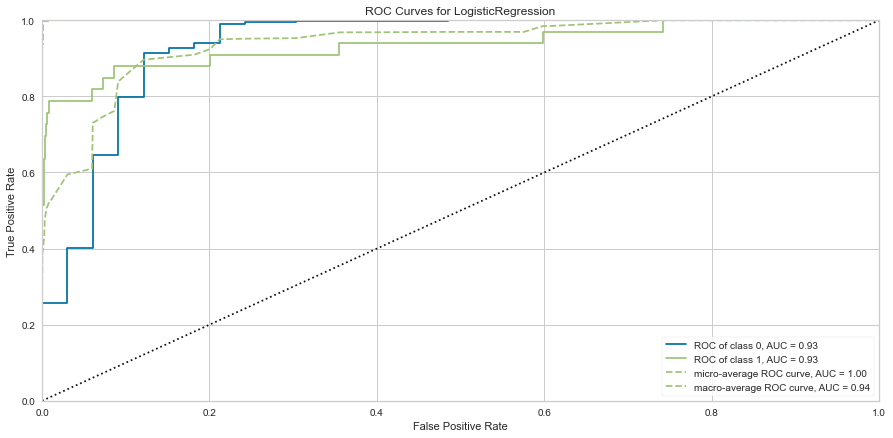

In [23]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model
model = LogisticRegression(max_iter=10000)

#The ConfusionMatrix visualizer taxes a model
#classes = ['Not_survived','Survived']
classes = [0,1]
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(A_train, B_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(A_val, B_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(A_train, B_train)  # Fit the training data to the visualizer
visualizer.score(A_val, B_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(A_train, B_train)  # Fit the training data to the visualizer
visualizer.score(A_val, B_val)  # Evaluate the model on the test data
g = visualizer.poof()
